In [1]:
import sys
sys.path.insert(0, 'D:\\PHD\\Research\\NRSR_Tutorial')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from Core2dsp import PLOT_Jiayu
from NRSR_Tutorial.dsp import load_demo, cal_fft, cal_stft

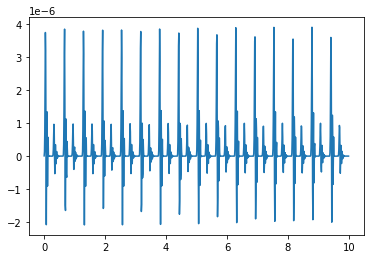

In [3]:
signal, time, _, _ = load_demo()
plt.plot(time, signal)
plt.show()

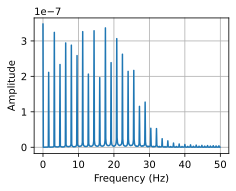

In [4]:
x_fft, y_fft = cal_fft(signal, 100, show=True)

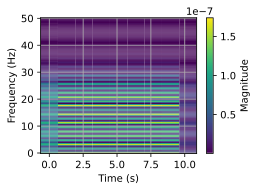

In [5]:
freqs, times, stft_matrix = cal_stft(signal, 100, show=True)

In [7]:
from NRSR_Tutorial.dsp import time_centroid_width, frequency_centroid_width
sampling_rate = 100

time_centroid, time_width = time_centroid_width(signal, sampling_rate)
frequency_centroid, frequency_width = frequency_centroid_width(signal, sampling_rate)

In [8]:
!pip install tftb

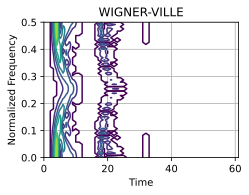

In [33]:
from tftb.processing import WignerVilleDistribution
template = signal[:len(signal)//16]
wvd = WignerVilleDistribution(template)
wvd.run()
# wvd.plot(kind='contour', extent=[0, template])
wvd.plot(kind='contour')


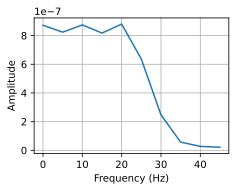

In [53]:
_, _ = cal_fft(template[:20], 100, show=True)


In [29]:
template_before = template.copy()
template_after = template.copy()

template_after[:30] = 0
template_before[30:] = 0

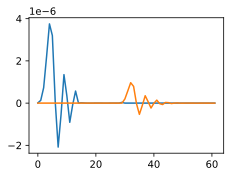

In [30]:

plt.plot(template_before)
plt.plot(template_after)

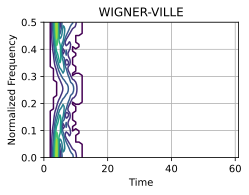

In [51]:
wvd = WignerVilleDistribution(template_before)
wvd.run()
wvd.plot(kind='contour', extent=[0, template, 0, 50])

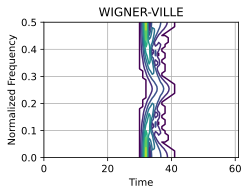

In [32]:
wvd = WignerVilleDistribution(template_after)
wvd.run()
wvd.plot(kind='contour', extent=[0, template])

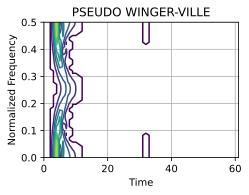

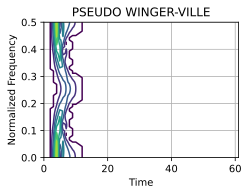

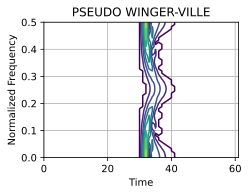

In [50]:
from tftb.processing import PseudoWignerVilleDistribution
template = signal[:len(signal)//16]
pwvd = PseudoWignerVilleDistribution(template)
pwvd.run()
# wvd.plot(kind='contour', extent=[0, template])
pwvd.plot(kind='contour', extent=[0, template, 50, 0])

pwvd = PseudoWignerVilleDistribution(template_before)
pwvd.run()
pwvd.plot(kind='contour', extent=[0, template])
pwvd = PseudoWignerVilleDistribution(template_after)
pwvd.run()
pwvd.plot(kind='contour', extent=[0, template])

C:\Users\86189\AppData\Local\Temp\ipykernel_24504\2498520266.py:13: UserWarning: The following kwargs were not used by contour: 'threshold'
  plt.contour(tfr, threshold=threshold)


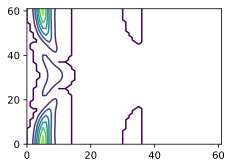

In [49]:
from tftb.processing import smoothed_pseudo_wigner_ville
template = signal[:len(signal)//16]
outputs = smoothed_pseudo_wigner_ville(template)

kwargs = []
kind='cmap'
threshold=0.02
sqmod=False
# scale = kwargs.pop("linear")
tfr = np.abs(outputs)
_threshold = np.amax(tfr) * threshold
tfr[tfr <= _threshold] = 0.0
plt.contour(tfr, threshold=threshold)

C:\Users\86189\AppData\Local\Temp\ipykernel_24504\2022313972.py:11: UserWarning: The following kwargs were not used by contour: 'threshold'
  plt.contour(tfr, threshold=threshold)


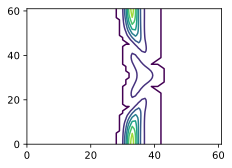

In [55]:
from tftb.processing import smoothed_pseudo_wigner_ville
outputs = smoothed_pseudo_wigner_ville(template_after)

kwargs = []
kind='cmap'
threshold=0.02
# scale = kwargs.pop("linear")
tfr = np.abs(outputs)
_threshold = np.amax(tfr) * threshold
tfr[tfr <= _threshold] = 0.0
plt.contour(tfr, threshold=threshold)